In [2]:
from scenedetect import VideoManager
from scenedetect import SceneManager
from scenedetect.detectors import ContentDetector
import subprocess
from datetime import timedelta
import os
import numpy as np
import glob
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd
import librosa.display
from tkinter import Tk
from tkinter import filedialog

In [4]:
Tk().withdraw()
filename = filedialog.askopenfilenames()
print(filename[0])

('C:/Users/Szymon/Downloads/darkred.mp3',)


In [6]:
# getting information from the file
time_series, sample_rate = librosa.load(filename[0])

In [54]:
print(len(time_series)/sample_rate)

174.66049886621315


In [7]:
# getting a matrix which contains amplitude values according to frequency and time indexes
stft = np.abs(librosa.stft(time_series, hop_length=512, n_fft=2048*4))

In [8]:
# converting the matrix to decibel matrix
spectrogram = librosa.amplitude_to_db(stft, ref=np.max)

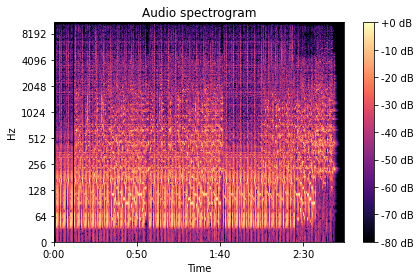

In [65]:
librosa.display.specshow(spectrogram,y_axis='log', x_axis='time')
plt.title('Audio spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

In [24]:
frequencies = librosa.core.fft_frequencies(n_fft=2048*4)
times = librosa.core.frames_to_time(np.arange(spectrogram.shape[1]), sr=sample_rate, hop_length=512, n_fft=2048*4)
time_index_ratio = len(times)/times[len(times) - 1]
frequencies_index_ratio = len(frequencies)/frequencies[len(frequencies)-1]

In [33]:
def get_decibel(target_time, freq):
    return spectrogram[int(freq*frequencies_index_ratio)][int(target_time*time_index_ratio)]

In [57]:
get_decibel(174,14)

-80.0

In [61]:
final_arr = []

In [ ]:
sub_bass_indices = [idx for idx,val in enumerate(freqs) if val >= 20 and val <= 60]
bass_indices = [idx for idx,val in enumerate(freqs) if val >= 60 and val <= 250]
low_midrange_indices = [idx for idx,val in enumerate(freqs) if val >= 250 and val <= 500]midrange_indices = [idx for idx,val in enumerate(freqs) if val >= 500 and val <= 2000]
upper_midrange_indices = [idx for idx,val in enumerate(freqs) if val >= 2000 and val <= 4000]
presence_indices = [idx for idx,val in enumerate(freqs) if val >= 4000 and val <= 6000]
brilliance_indices = [idx for idx,val in enumerate(freqs) if val >= 6000 and val <= 20000]

In [ ]:
for i in range(8192):
    print()

In [63]:
for i in range(173):
    print(get_decibel(i,100))
    final_arr.append(get_decibel(i,100))

-80.0
-80.0
-17.317875
-15.429832
-16.431183
-37.40323
-19.188179
-29.96079
-60.050484
-27.47952
-14.214115
-16.957676
-61.279224
-17.424366
-26.163948
-37.974655
-22.88612
-17.670692
-17.906979
-33.951023
-18.285927
-34.190186
-58.41384
-28.046982
-17.906734
-17.48106
-38.222546
-13.958485
-21.090603
-39.41107
-27.505074
-19.863693
-18.328629
-39.620934
-17.651985
-24.061207
-48.527477
-25.486816
-25.406849
-26.376177
-36.39987
-14.511551
-19.419273
-11.11853
-33.39511
-41.107292
-28.669907
-28.751408
-10.393646
-12.493156
-20.897991
-30.585697
-35.773975
-31.81004
-26.427828
-18.298721
-26.163107
-51.66688
-51.6894
-42.45954
-26.723007
-31.222755
-18.533527
-13.665363
-20.74757
-29.124762
-35.705082
-27.399174
-37.672325
-16.572758
-12.551907
-15.073574
-44.957497
-28.907896
-36.381218
-36.497
-21.067509
-14.281956
-16.194363
-37.09307
-27.25824
-26.41892
-22.426159
-17.51973
-16.576756
-16.432957
-30.737616
-13.553169
-7.3930016
-42.196564
-22.972412
-24.727215
-17.120106
-20.754002

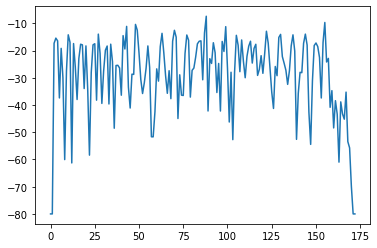

In [64]:
plt.plot(final_arr)